In [1]:
# For preprocessing
from keras.preprocessing.image import ImageDataGenerator

# For sequential CNN
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

# For Inception
from keras import Input
from keras import Model

# Plotting
from keras.utils import plot_model
import matplotlib.pyplot as plt
# MacOS matplotlib kernel issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.
C:\Users\jmohd\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jmohd\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jmohd\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jmohd\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
dataset = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = dataset.flow_from_directory('../Datasets/kagglecatsanddogs_3367a/PetImages/', 
                                        classes=['Cat', 'Dog'], 
                                        target_size = (128, 128), 
                                        batch_size = 32, 
                                        color_mode='rgb', subset='training')
valid_gen = dataset.flow_from_directory('../Datasets/kagglecatsanddogs_3367a/PetImages/', 
                                        classes=['Cat', 'Dog'], 
                                        target_size = (128, 128), 
                                        batch_size = 32, 
                                        color_mode='rgb', subset='validation')

# Note that Cat/666.jpg and Dog/11702.jpg images are corrupted in the dataset

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [3]:
sequential_cnn = Sequential()
sequential_cnn.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=train_gen.image_shape))
sequential_cnn.add(layers.MaxPool2D((2,2)))
sequential_cnn.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
sequential_cnn.add(layers.MaxPool2D((2,2)))
sequential_cnn.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
sequential_cnn.add(layers.MaxPool2D((2,2)))
sequential_cnn.add(layers.Conv2D(256, kernel_size=3, activation='relu'))
sequential_cnn.add(layers.MaxPool2D((2,2)))
sequential_cnn.add(layers.Conv2D(512, kernel_size=3, activation='relu'))
sequential_cnn.add(layers.Flatten())
sequential_cnn.add(layers.Dense(256, activation='relu'))
sequential_cnn.add(layers.Dense(2, activation='sigmoid'))

In [4]:
sequential_cnn.compile(optimizer=Adam(lr=0.001), loss=binary_crossentropy, metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
sequential_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)      

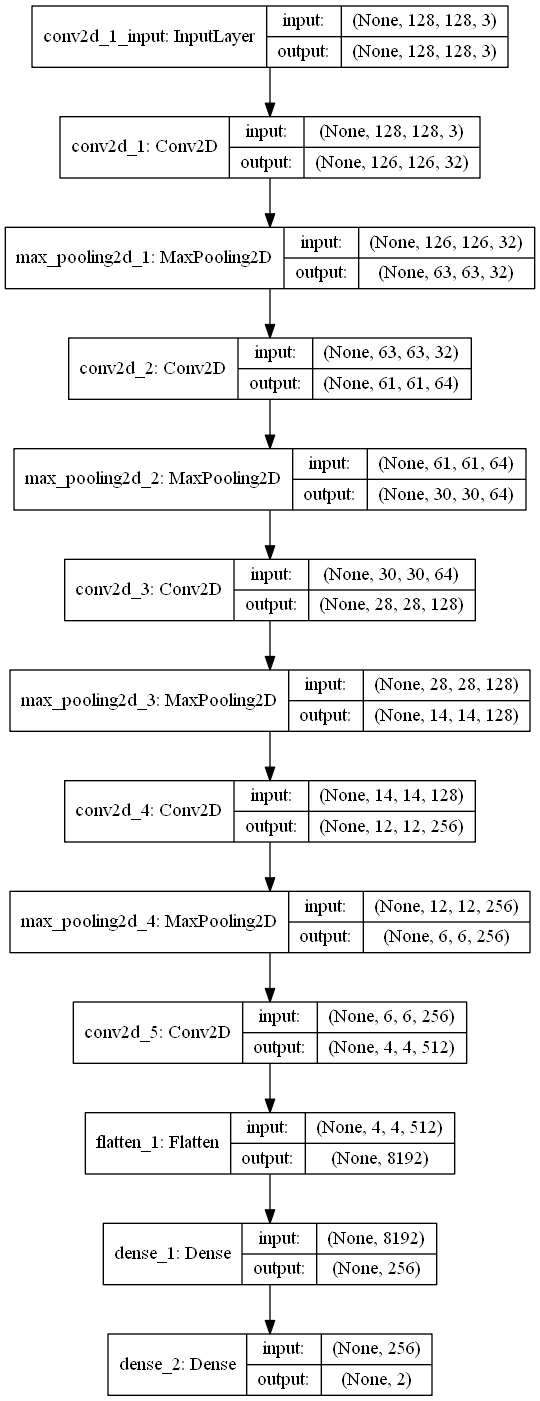

In [6]:
plot_model(sequential_cnn, to_file="sequential_cnn.png", show_shapes=True, show_layer_names=True)

In [7]:
sequential_fit = sequential_cnn.fit_generator(train_gen, steps_per_epoch=100, epochs=30, 
                                              validation_data=valid_gen, validation_steps=50)


Epoch 1/30
100/100 [==============================] - 20s 198ms/step - loss: 0.6935 - acc: 0.5139 - val_loss: 0.6859 - val_acc: 0.5113
Epoch 2/30
100/100 [==============================] - 17s 170ms/step - loss: 0.6897 - acc: 0.5175 - val_loss: 0.7865 - val_acc: 0.4981
Epoch 3/30
100/100 [==============================] - 17s 169ms/step - loss: 0.6829 - acc: 0.5606 - val_loss: 0.6399 - val_acc: 0.5084
Epoch 4/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6669 - acc: 0.5992 - val_loss: 0.6054 - val_acc: 0.6490
Epoch 5/30
 41/100 [===========>..................] - ETA: 6s - loss: 0.6495 - acc: 0.6082

C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to r

100/100 [==============================] - 15s 153ms/step - loss: 0.6433 - acc: 0.6317 - val_loss: 0.5298 - val_acc: 0.6853
Epoch 6/30
100/100 [==============================] - 15s 155ms/step - loss: 0.6207 - acc: 0.6464 - val_loss: 0.5371 - val_acc: 0.6675
Epoch 7/30
100/100 [==============================] - 10s 96ms/step - loss: 0.5926 - acc: 0.6834 - val_loss: 0.6573 - val_acc: 0.7112
Epoch 8/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5626 - acc: 0.7164 - val_loss: 0.4693 - val_acc: 0.7372
Epoch 9/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5434 - acc: 0.7322 - val_loss: 0.5622 - val_acc: 0.7334
Epoch 10/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5035 - acc: 0.7638 - val_loss: 0.5738 - val_acc: 0.7386
Epoch 11/30
100/100 [==============================] - 9s 87ms/step - loss: 0.4871 - acc: 0.7677 - val_loss: 0.5548 - val_acc: 0.6928
Epoch 12/30
100/100 [==============================] - 9s 87ms/step - los

In [9]:
valid_acc = sequential_cnn.evaluate_generator(valid_gen, steps=50)
print(valid_acc)

[0.277515709400177, 0.8675000071525574]


In [10]:
inception_input = Input(shape=train_gen.image_shape)

block1 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(inception_input)
block1 = layers.MaxPooling2D((2,2))(block1)
block1 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(block1)
block1 = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(block1)
block1 = layers.MaxPooling2D((2,2))(block1)
block1 = layers.Conv2D(16, kernel_size=3, padding='same', activation='relu')(block1)

block2 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(inception_input)
block2 = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(block2)
block2 = layers.MaxPooling2D((2,2))(block2)
block2 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(block2)
block2 = layers.MaxPooling2D((2,2))(block2)
block2 = layers.Conv2D(16, kernel_size=3, padding='same', activation='relu')(block2)

inception_output = layers.concatenate([block1, block2], axis=1)
inception_output = layers.Flatten()(inception_output)
inception_output = layers.Dense(2, activation='sigmoid')(inception_output)

inception_model = Model(inputs=inception_input, outputs=inception_output)

In [11]:
inception_model.compile(optimizer=Adam(lr=0.0001), loss=binary_crossentropy, metrics=['acc'])

In [12]:
inception_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 64, 64, 64)   0           conv2d_6[0][0]                   
____________________________________________________________________________________________

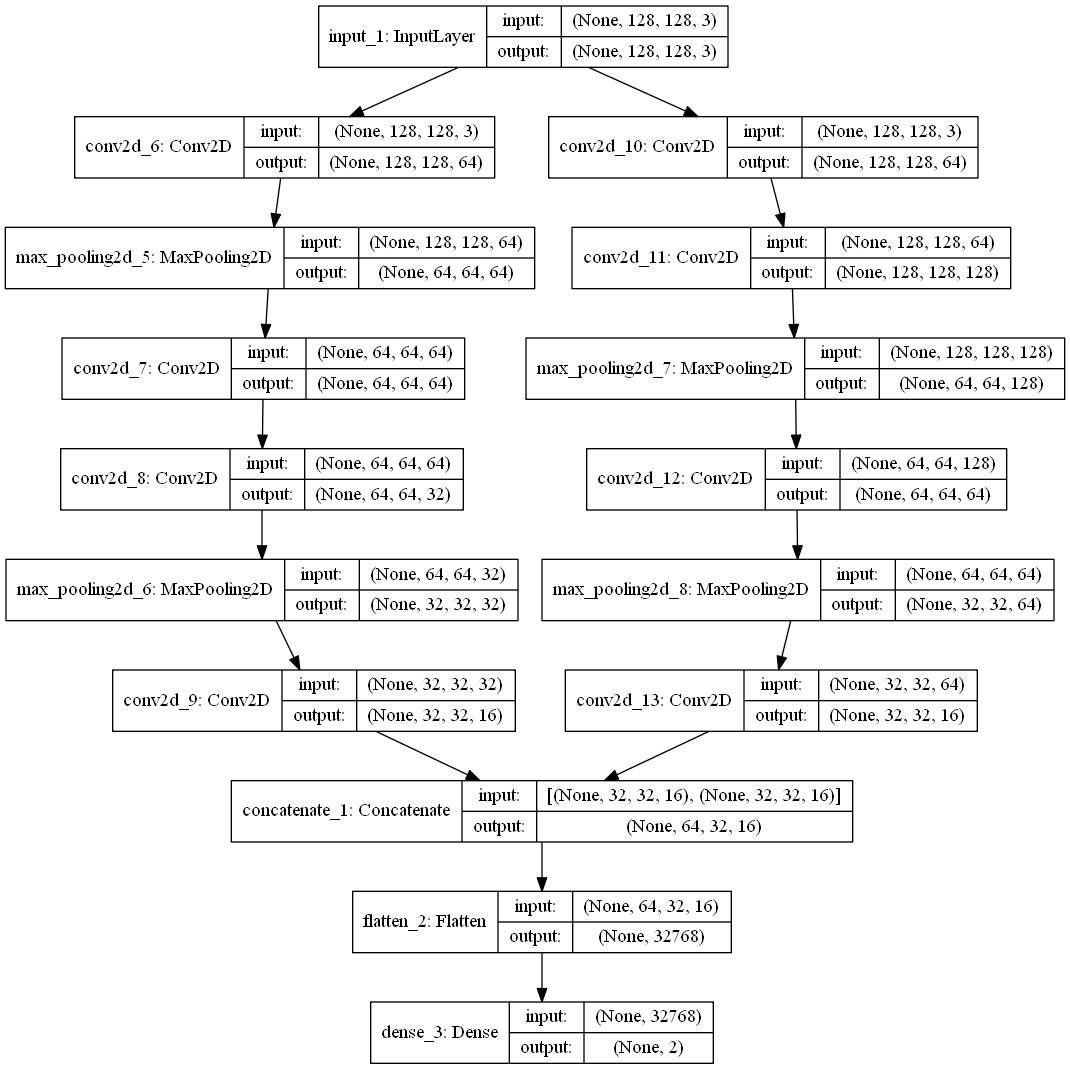

In [13]:
plot_model(inception_model, to_file="inception_cnn.png", show_shapes=True, show_layer_names=True)

In [14]:
inception_fit = inception_model.fit_generator(train_gen, steps_per_epoch=100, epochs=30, 
                                              validation_data=valid_gen, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6883 - acc: 0.5389 - val_loss: 0.6562 - val_acc: 0.6019
Epoch 2/30
100/100 [==============================] - 11s 105ms/step - loss: 0.6663 - acc: 0.5869 - val_loss: 0.5976 - val_acc: 0.6506
Epoch 3/30
 61/100 [=================>............] - ETA: 3s - loss: 0.6461 - acc: 0.6066

C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\jmohd\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to r

100/100 [==============================] - 10s 104ms/step - loss: 0.6347 - acc: 0.6270 - val_loss: 0.6659 - val_acc: 0.6731
Epoch 4/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5933 - acc: 0.6822 - val_loss: 0.6509 - val_acc: 0.6877
Epoch 5/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5667 - acc: 0.7030 - val_loss: 0.6501 - val_acc: 0.7072
Epoch 6/30
100/100 [==============================] - 10s 103ms/step - loss: 0.5684 - acc: 0.7163 - val_loss: 0.6462 - val_acc: 0.7391
Epoch 7/30
100/100 [==============================] - 11s 105ms/step - loss: 0.5464 - acc: 0.7245 - val_loss: 0.5558 - val_acc: 0.7287
Epoch 8/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5316 - acc: 0.7380 - val_loss: 0.6477 - val_acc: 0.7284
Epoch 9/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5305 - acc: 0.7297 - val_loss: 0.5745 - val_acc: 0.7294
Epoch 10/30
100/100 [==============================] - 10s 104ms/s

In [16]:
valid_acc = inception_model.evaluate_generator(valid_gen, steps=50)
print(valid_acc)

[0.6010021567344666, 0.7984374761581421]
